In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from plotnine import *

In [2]:
df_diamonds = pd.read_csv('Datasets/diamonds.csv')

In [3]:
df_diamonds.shape

(53940, 11)

In [4]:
df_diamonds.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [5]:
print(df_diamonds['cut'].unique().tolist())
print(df_diamonds['clarity'].unique().tolist())
print(df_diamonds['color'].unique().tolist())

['Ideal', 'Premium', 'Good', 'Very Good', 'Fair']
['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF']
['E', 'I', 'J', 'H', 'F', 'G', 'D']


### Rename columns

In [6]:
df_diamonds.rename(columns = {"x": "length", "y": "width", "z": "height"}, inplace = True)

In [7]:
df_diamonds.drop(columns = 'Unnamed: 0', axis = 1, inplace = True )

In [8]:
df_diamonds.describe()

,carat,depth,table,price,length,width,height
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


### Observation:
1. Length, width and height have zero values that are not valid

In [9]:
df_diamonds.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
length     0
width      0
height     0
dtype: int64

In [10]:
df_diamonds.loc[(df_diamonds.length == 0) | (df_diamonds.width == 0)| (df_diamonds.height == 0)]

,carat,cut,color,clarity,depth,table,price,length,width,height
2207,1.00,Premium,G,SI2,59.1,59.0,3142,6.55,6.48,0.0
2314,1.01,Premium,H,I1,58.1,59.0,3167,6.66,6.60,0.0
4791,1.10,Premium,G,SI2,63.0,59.0,3696,6.50,6.47,0.0
5471,1.01,Premium,F,SI2,59.2,58.0,3837,6.50,6.47,0.0
10167,1.50,Good,G,I1,64.0,61.0,4731,7.15,7.04,0.0
11182,1.07,Ideal,F,SI2,61.6,56.0,4954,0.00,6.62,0.0
11963,1.00,Very Good,H,VS2,63.3,53.0,5139,0.00,0.00,0.0
13601,1.15,Ideal,G,VS2,59.2,56.0,5564,6.88,6.83,0.0
15951,1.14,Fair,G,VS1,57.5,67.0,6381,0.00,0.00,0.0
24394,2.18,Premium,H,SI2,59.4,61.0,12631,8.49,8.45,0.0


In [11]:
import numpy as np
df_diamonds[['length','width','height']]=df_diamonds[['length','width','height']].replace(0,np.NaN)

In [12]:
df_diamonds.dropna(inplace = True)

In [13]:
df_diamonds.shape

(53920, 10)

In [14]:
### distribution of the diferent types of diamonds based on cut, color and clarity? 
### how is price related to carat?

plt_cut = ggplot(df_diamonds, aes(x='cut')) + geom_bar(fill = 'blue')

plt_color = ggplot(df_diamonds, aes(x='color')) + geom_bar(fill = 'green')

plt_clarity = ggplot(df_diamonds, aes(x='clarity')) + geom_bar(fill = 'yellow')

combined_plt = ggarrange(plt_cut, plt_color, plt_clarity,
                    labels = c("Cut", "Color", "Clarity"),
                    ncol = 2, nrow = 2)
print(combined_plt)

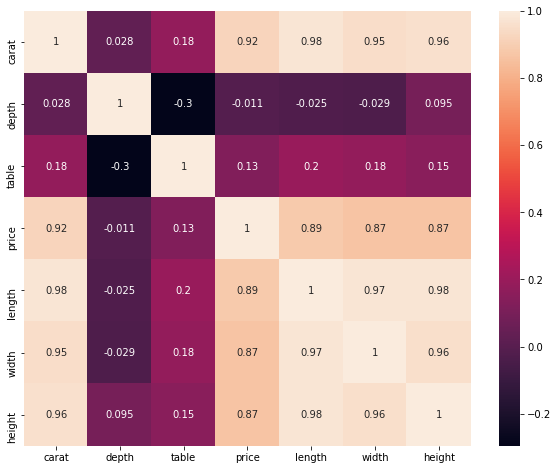

In [15]:
plt.figure(figsize=(10,8))
sns.heatmap(df_diamonds.corr(), annot=True)

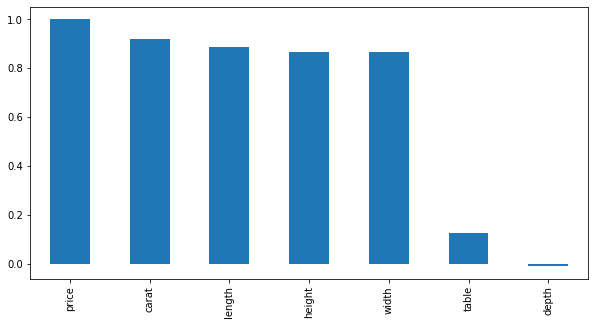

In [16]:
corr_mat = df_diamonds.corr()
plt.figure(figsize = (10,5))
corr_mat['price'].sort_values(ascending = False).plot(kind = 'bar');

### Observation
carat, length, width, height, and price have a high correlation with each other.

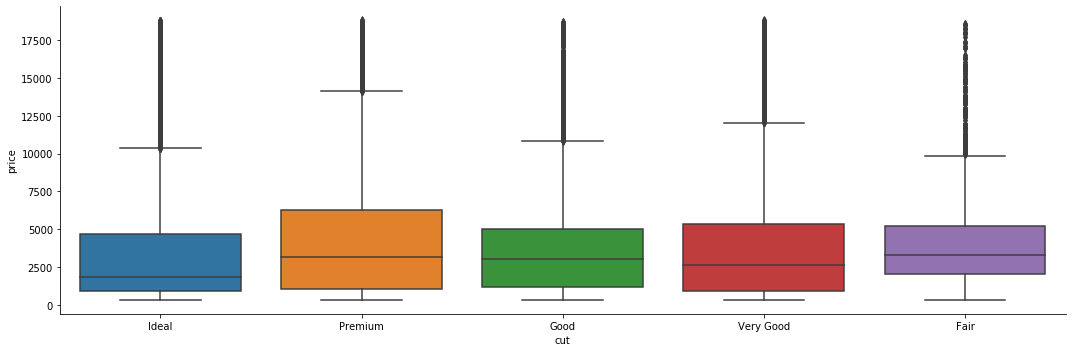

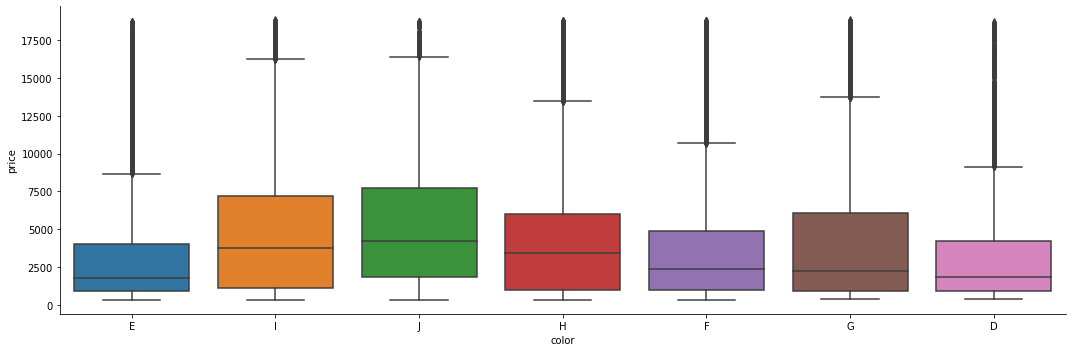

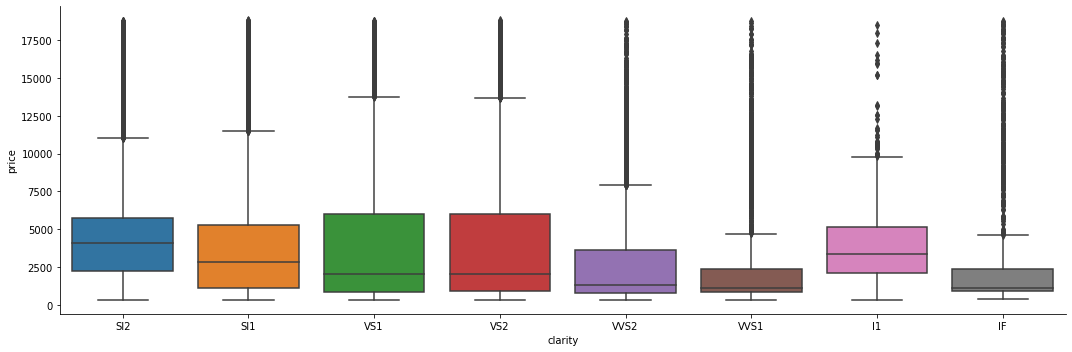

In [17]:
input_cat_columns = df_diamonds.select_dtypes(include = ['object']).columns.tolist()

for col in input_cat_columns:
    sns.catplot(x=col, y="price",
            kind="box", dodge=False, height = 5, aspect = 3,data=df_diamonds);

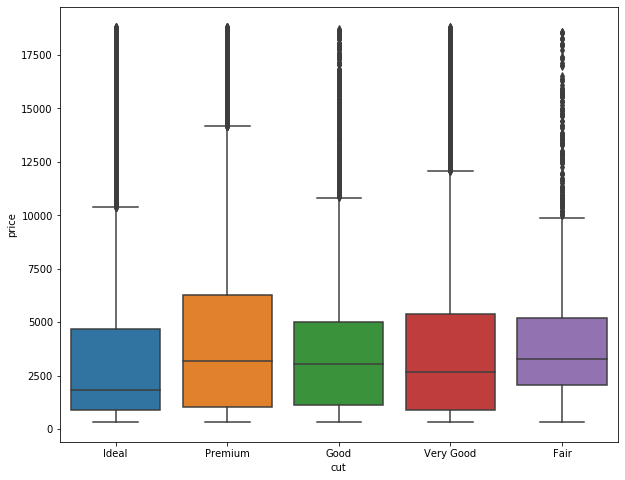

In [18]:
plt.figure(figsize = (10,8))
sns. boxplot(x = 'cut', y = 'price', data = df_diamonds)

### Observation:
1. Same maximum and minimum for all three categories
2. Less outliers for premium cut
3. Why does Fair cut have a higher median compared to the others? more outliers as well.

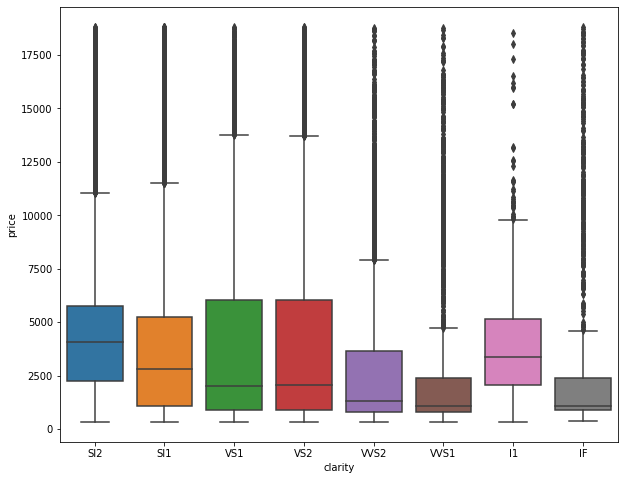

In [19]:
plt.figure(figsize = (10,8))
sns. boxplot(x = 'clarity', y = 'price', data = df_diamonds)

### Observation:
1. same maximum and minumum for all categories
2. highest price for s12

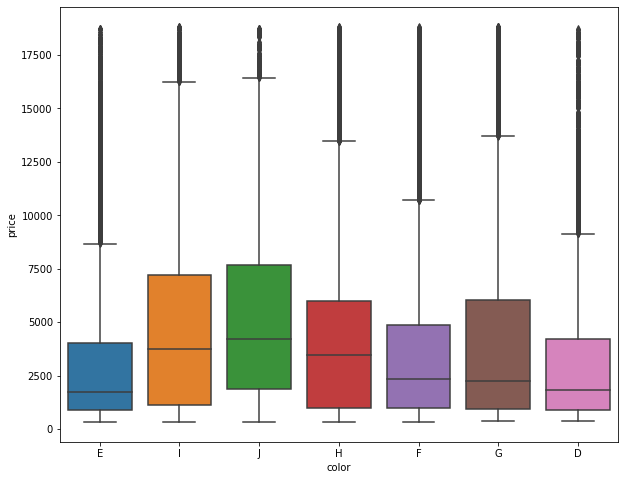

In [20]:
plt.figure(figsize = (10,8))
sns. boxplot(x = 'color', y = 'price', data = df_diamonds)

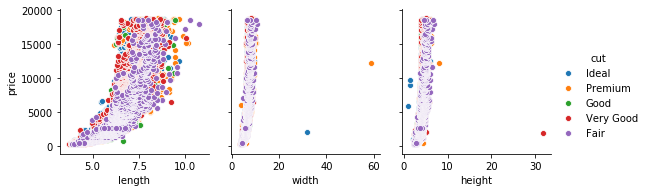

In [21]:
sns.pairplot(df_diamonds, x_vars = ['length','width','height'] , y_vars =  ['price'], hue ='cut')

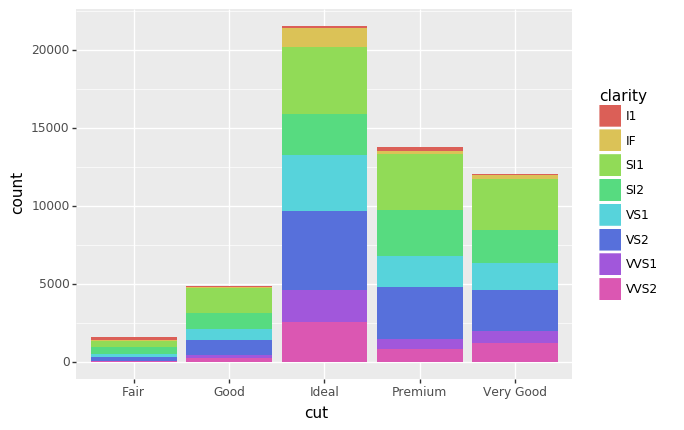

<ggplot: (7013121561)>


In [22]:
gg_plt = ggplot(df_diamonds, aes(x = 'cut', fill = 'clarity')) + geom_bar()
print(gg_plt)

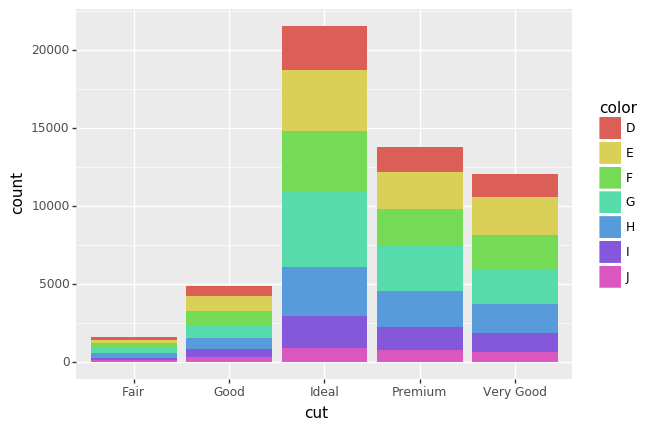

<ggplot: (7011629933)>


In [23]:
gg_plt2 = ggplot(df_diamonds, aes(x = 'cut', fill = 'color')) + geom_bar()
print(gg_plt2)

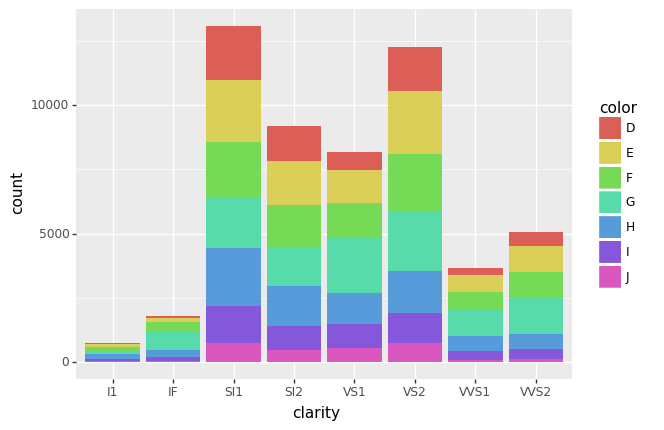

<ggplot: (7013129969)>


In [24]:
gg_plt3 = ggplot(df_diamonds, aes(x = 'clarity', fill = 'color')) + geom_bar()
print(gg_plt3)

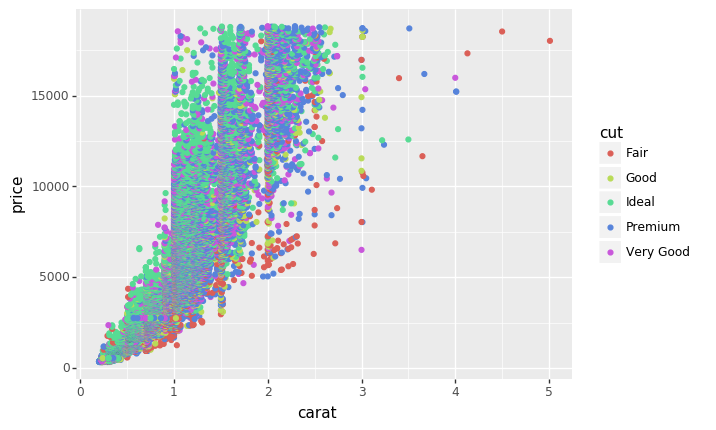

<ggplot: (7012075321)>


In [25]:
plt_price = ggplot(df_diamonds, aes(x= 'carat', y = 'price')) 
p1 = plt_price + geom_point(aes(color ='cut'))
print(p1)

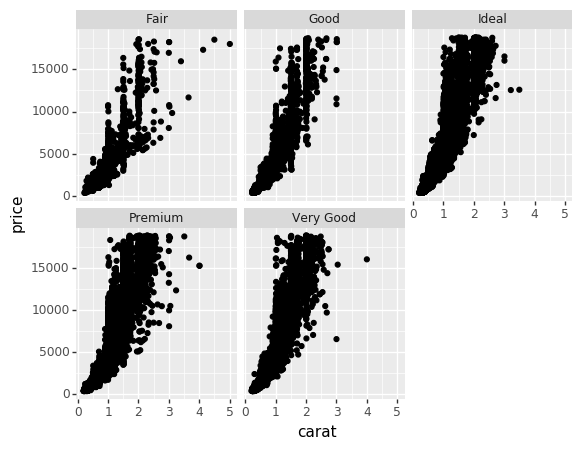

<ggplot: (7014656009)>


In [26]:
p2 = plt_price + geom_point() + facet_wrap('~cut')
print(p2)

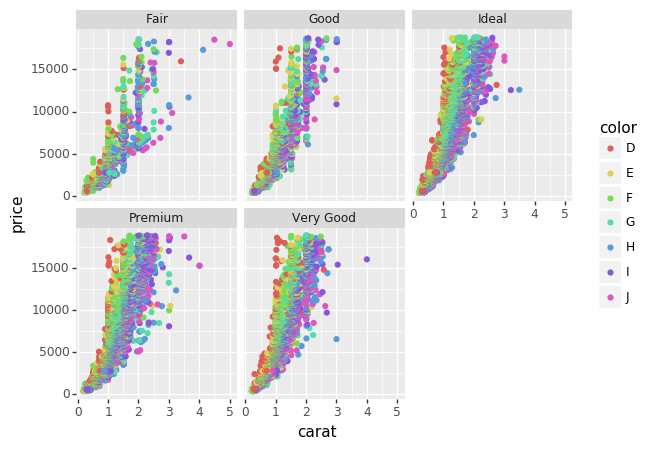

<ggplot: (7013487705)>


In [27]:
p3 = plt_price + geom_point(aes(color = 'color')) + facet_wrap('~cut')
print(p3)

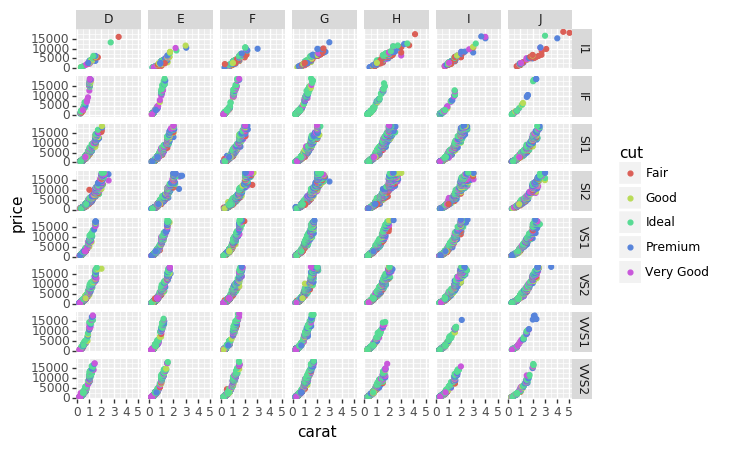

<ggplot: (7020176449)>


In [28]:
p4 = plt_price + geom_point(aes(color = 'cut')) + facet_grid('clarity~color')
print(p4)

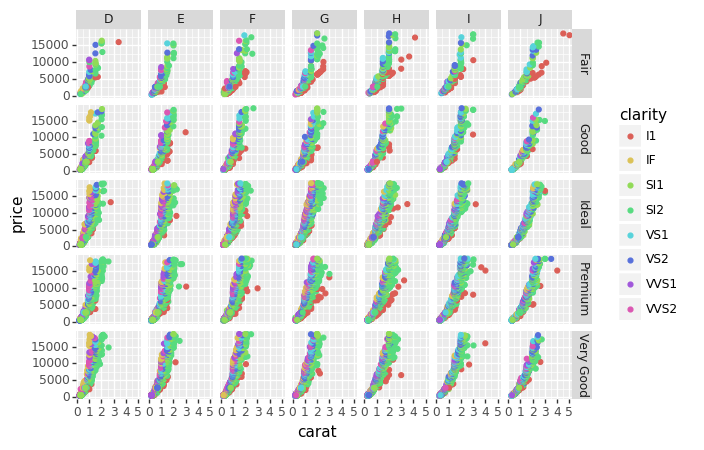

<ggplot: (7019155829)>


In [29]:
p5 = plt_price + geom_point(aes(color = 'clarity')) + facet_grid('cut~color')
print(p5)